# Coding Temple's Data Analytics FT Program
---
## Python for DA: ETL Pipelines and T-Testing

## ETL Pipelines:

An ETL Pipeline takes in data, performs transformations to it, then loads it into another file or database. We create these using Python Scripts; however, before we script this all out, we will want to start in a notebook environment to test the code and see it execute!


To start with, we will work to `wrangle` the data using a UDF. 

Wrangling data refers to the process of reading in data and cleaning it. We will create a function to wrangle our data and continue to build upon it as we clean the data, rolling all parts of the process into a single function call.

### Part 1: Imports

To start with, we will import the necessary libraries we will need for wrangling our data today. We will be importing:

* pandas
* seaborn
* matplotlib


In [5]:
# Import statements
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Part 2: Create a baseline wrangle function

We will now build out a wrangle function. We will come back to this function to wrangle our data, meaning it will not only read in our data, but will also take care of all our cleaning in a single function! As we test our cleaning in the notebook, we will build on the wrangle function we are creating here.

In [6]:
# Wrangle dataset
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    new_cat = [df['category'][index].split(sep='|') for index in range(len(df))]
    new_prices = [df['amount'][index].split(sep='|') for index in range(len(df))]
    order_ids = [df['order_id'][index] for index in range(len(df))]
    
    c = 0
    for l1, l2 in zip(new_cat, new_prices):
        for cat, price in zip(l1, l2):
            df.loc[len(df.index)] = [order_ids[c], cat, price]
        c += 1
    
    df = df[4:].reset_index(drop=True)
    return df

In [7]:
df = wrangle(r'C:\Users\Alex Lucchesi\coding-temple\coding_temple_data_analytics_ft\week-4\data\Invoices-with-Merged-Categories-and-Merged-Amounts.csv')
df.head()

,order_id,category,amount
0,CA-2011-167199,Binders,609.98
1,CA-2011-167199,Art,5.48
2,CA-2011-167199,Phones,391.98
3,CA-2011-167199,Fasteners,755.96
4,CA-2011-167199,Paper,31.12


### Part 3: Cleaning the Data

Let's begin cleaning the dataset and exploring the data using our Exploratory Data Analysis!

What do we think we need to do to this dataset to clean it properly?

* 

In [8]:
# Let's change column names first:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'category', 'amount'], dtype='object')

In [9]:
# Now, let's separate out the columns with a pipe in them:
new_cat = [df['category'][index].split(sep='|') for index in range(len(df))]
new_prices = [df['amount'][index].split(sep='|') for index in range(len(df))]
order_ids = [df['order_id'][index] for index in range(len(df))]
# View new lists:
# print(new_cat)
# print(new_prices)
# print(order_ids)
c = 0
for l1, l2 in zip(new_cat, new_prices):
    for cat, price in zip(l1, l2):
        print(f'{order_ids[c]}, {cat}, {price}')
        df.loc[len(df.index)] = [order_ids[c], cat, price]
    c += 1

CA-2011-167199, Binders , 609.98 
CA-2011-167199,  Art ,  5.48 
CA-2011-167199,  Phones ,  391.98 
CA-2011-167199,  Fasteners ,  755.96 
CA-2011-167199,  Paper,  31.12
CA-2011-149020, Office Supplies , 2.98 
CA-2011-149020,  Furniture,  51.94
CA-2011-131905, Office Supplies , 7.2 
CA-2011-131905,  Technology ,  42.0186 
CA-2011-131905,  Technology,  42.035
CA-2011-127614, Accessories , 234.45 
CA-2011-127614,  Tables ,  1256.22 
CA-2011-127614,  Binders,  17.46


In [ ]:
df = df[4:]
df

,order_id,category,amount
4,CA-2011-167199,Binders,609.98
5,CA-2011-167199,Art,5.48
6,CA-2011-167199,Phones,391.98
7,CA-2011-167199,Fasteners,755.96
8,CA-2011-167199,Paper,31.12
9,CA-2011-149020,Office Supplies,2.98
10,CA-2011-149020,Furniture,51.94
11,CA-2011-131905,Office Supplies,7.2
12,CA-2011-131905,Technology,42.0186
13,CA-2011-131905,Technology,42.035


### In-Class Exercise 1:

Take the Hospital Data from the Google Classroom and create your own wrangle function from it. Your function should:

1. Read in the data from your local machine
2. Clean the data completely

You will need to test your code in the notebook before adding it to your function!

In [ ]:
# YOUR CODE HERE

### Part 4: Creating Visualizations of the Data

In Exploratory Data Analysis(EDA), we will want to create visualizations of the dataset. A lot of the insight we glean will come from different visualizations that we create.



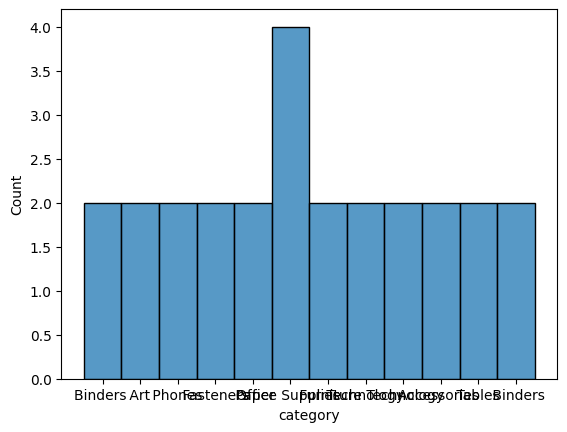

In [11]:
# Let's create visualizations using seaborn
sns.histplot(data=df, x = 'category')
plt.savefig('histogram_of_category.png')

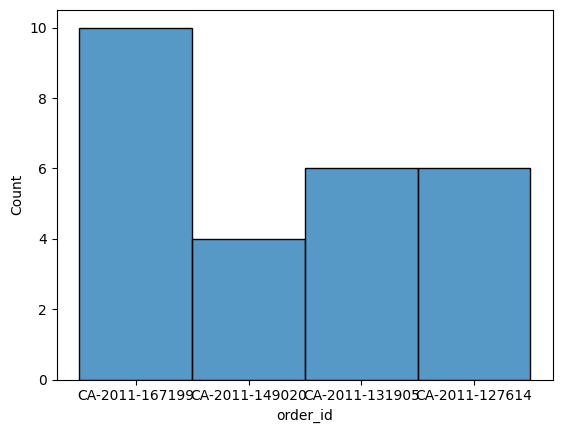

In [12]:
sns.histplot(data=df,x='order_id')
plt.savefig('histogram_of_order_id.png')

### In-Class Exercise 2: Visualizations
Using the dataset you cleaned in the first exercise, create 5 visualizations from the dataset, each exploring a question you want to ask of the data.

In [ ]:
# YOUR CODE HERE

### Part 5: Save the cleaned data and any prevalent visualizations to a file

In [ ]:
df.to_csv('new_data.csv')

### Part 6: Combine it all into a single Python script

Now, we will ensure all the steps we have make it over to our ETL pipeline! Once they are all copied over, we should test our script to ensure it is running properly.

## Hypothesis and T-Testing in Python

### General idea behind the t-test

Mathematically, we know that if the mean caffeine content in all fountain soda is 34mg per 12 oz, most samples we take from that population will have a mean that is very close to 34mg per 12 oz.
![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%202.png)

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%203.png)

### Introducing the t-distribution

So, I lied... kind of.  

While the Central Limit Theorem works perfectly in theoretical math land, in practical reality land, distribution of the sample mean isn't exactly Normal.

Instead, the sample mean follows what is called a t-distribution.  The t-distribution has a similar shape to the Normal distribution but it is able to flex depending on the sample size.  The t-distribution is able to incorporate uncertainty when dealing with small sample size.

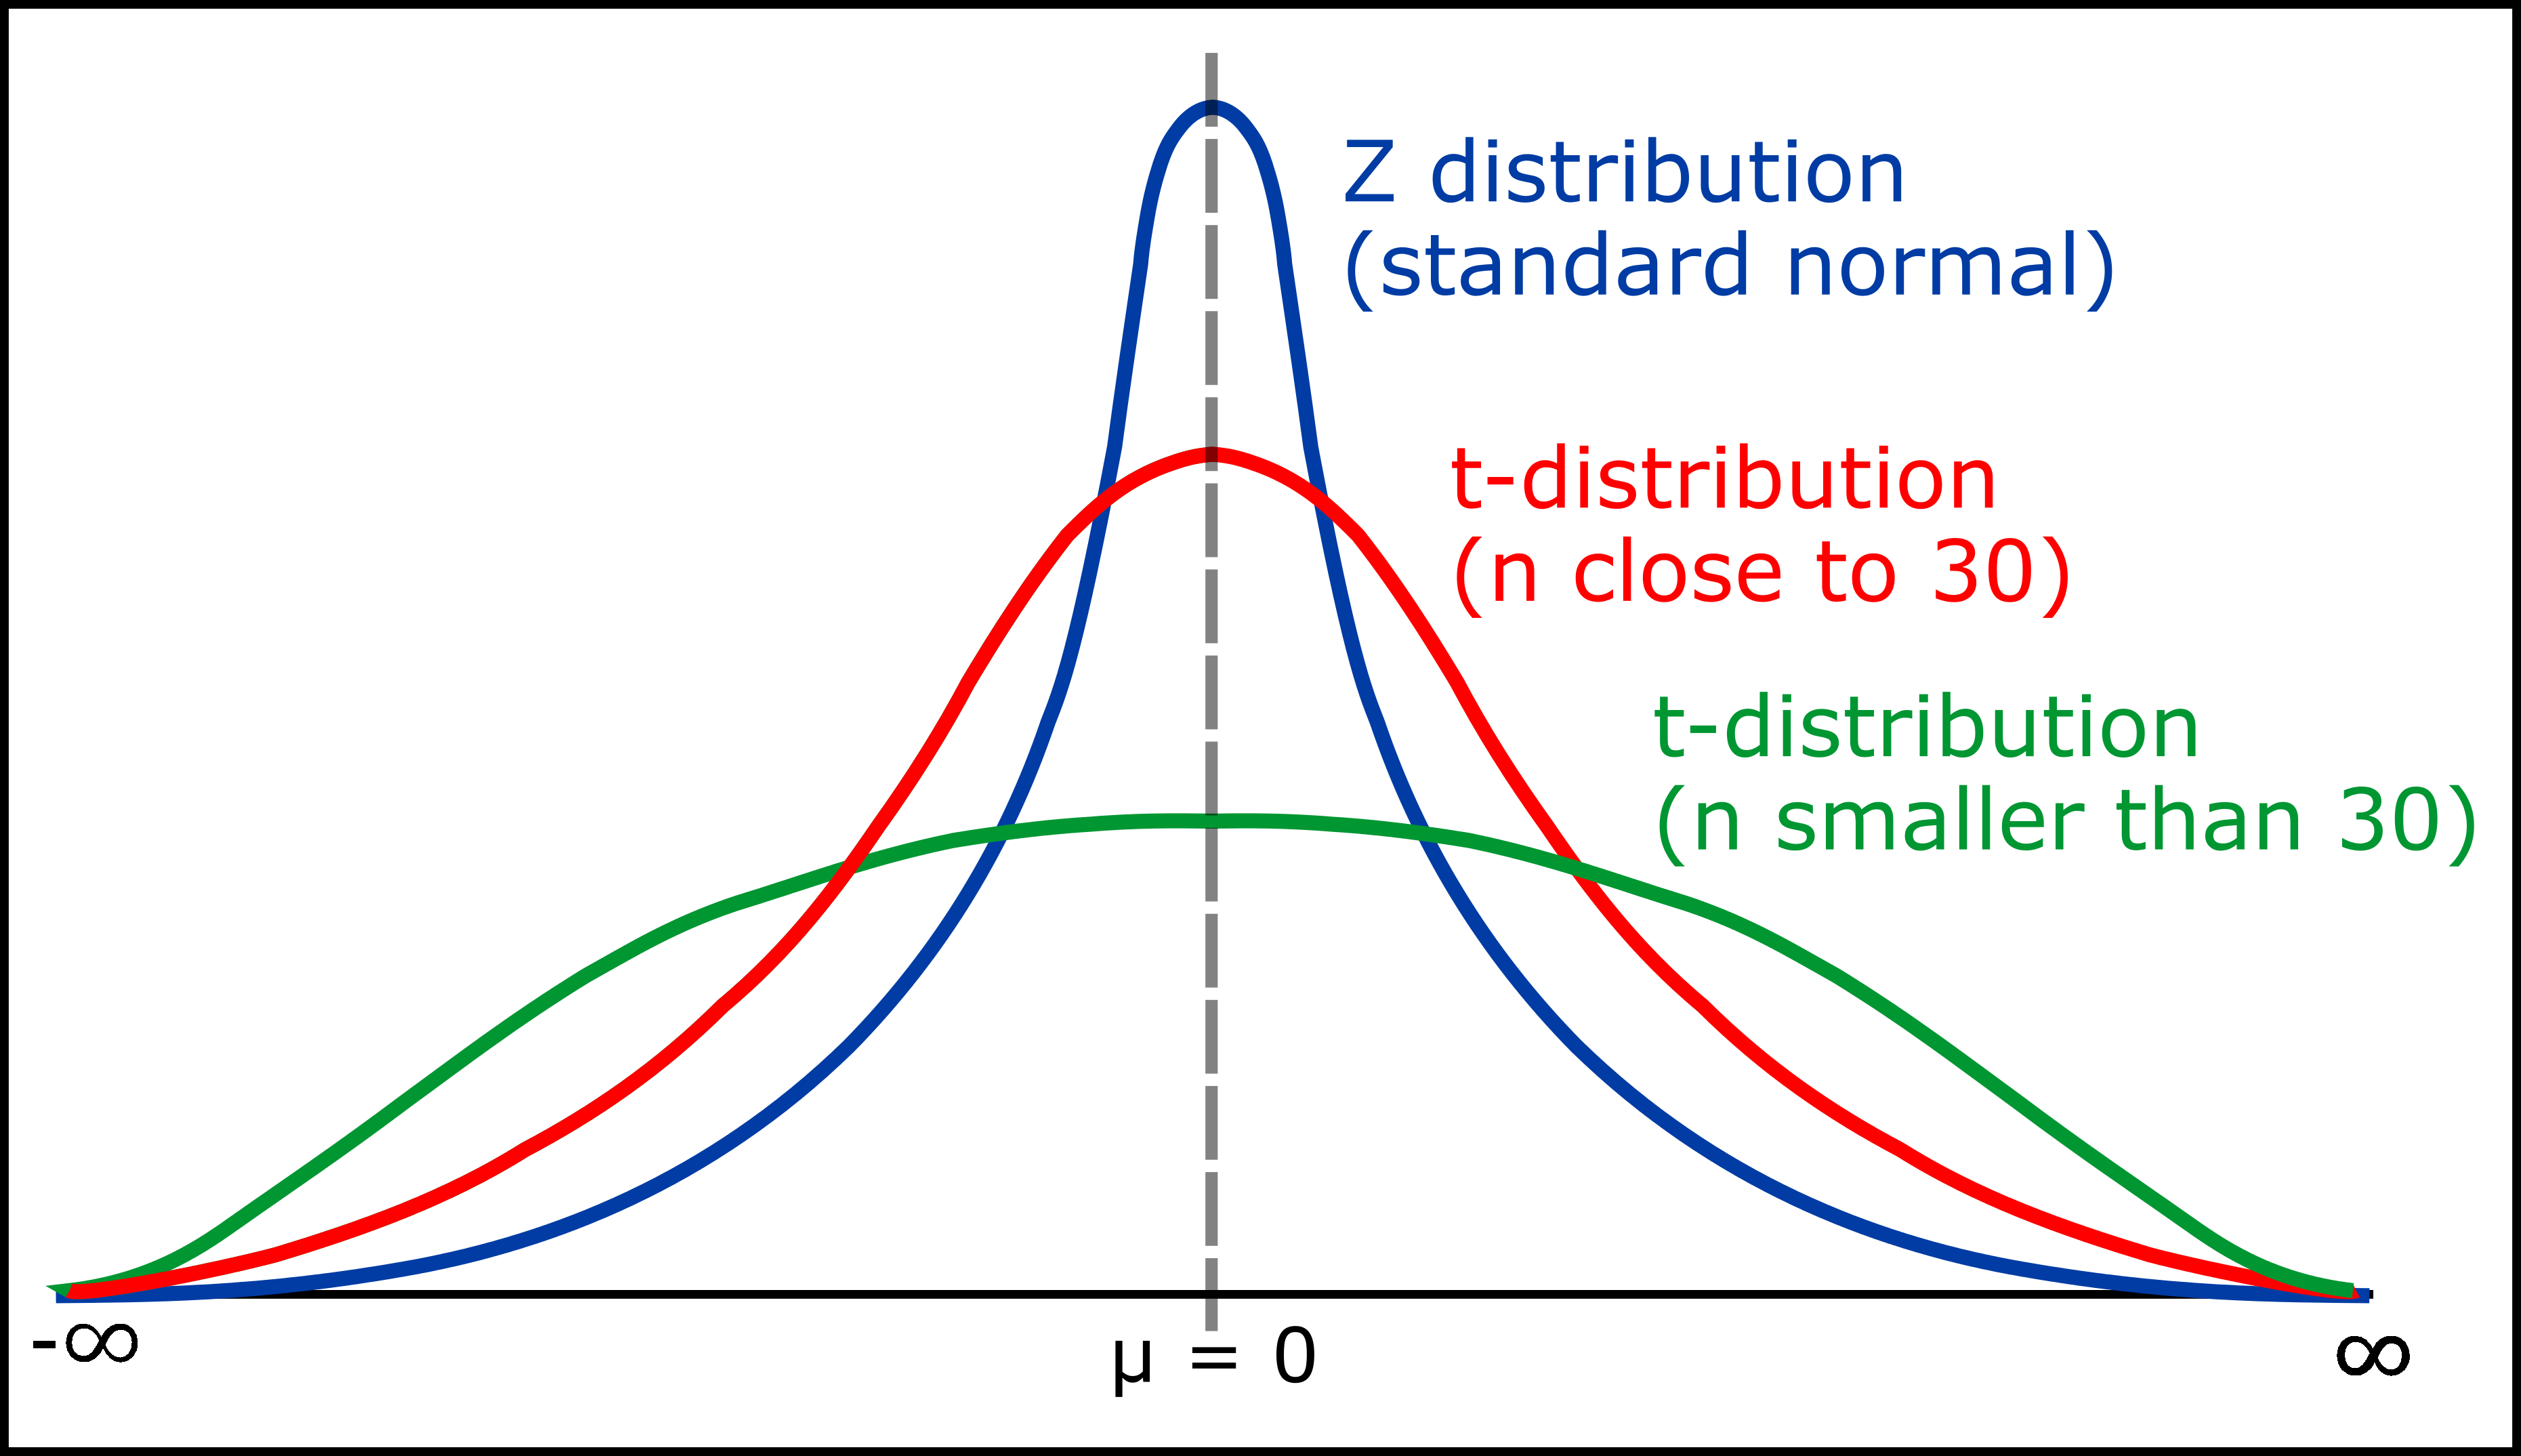


### Part 1: Imports

For today's lesson, we are going to be working with the `scipy` library. This library has many statistical packages associated with it and allows us to access a plethora of statistical methods.

In [ ]:
import scipy as stats
import numpy as np

### Part 2: How to Run a 1-Sample T-Test

In [ ]:
# Set seed to keep randomization constant
np.random.seed(42)

# Create an array of values to run test on
group = np.random.normal(150,10,20)

# Display values
print(f'Here is a random sample to use in our t-test: {group}')

In [ ]:
# T-Tests output two variables: a t-stat and the p-value
# ttest_1samp takes two positional arguments: the sample we are testing, the mean of the population we are assuming
t_stat, p_value = stats.stats.ttest_1samp(group, 155)

# View values
print(f'T-statistic Value: {t_stat}')
print(f'P-Value: {p_value}')

Source: A.N. Garand and L.N. Bell (1997). "Caffeine Content of Fountain and Private-Label Store Brand Carbonated Beverages," Journal of the American Dietetic Association, Vol. 97, #2, pp. 179-182.

Soft drinks like Coke and Pepsi are manufactured to have a standard caffeine content. For example, a 12-oz serving of Coke has 34 mg of caffeine, and a 12-oz serving of Pepsi has 37.6 mg of caffeine. However, fountain soft drinks are typically mixed in individual restaurant dispensers, so it is more difficult to maintain a standard level of caffeine per serving. 

Imagine you are in a quality assurance role at Coke assigned to ensure that franchise restaurants that serve Coke beverages are maintaining product consistancy.  In particular, you wish to ensure that Coke mixed in fountain soft drink dispensers has the standard caffeine content of 34 mg per 12 oz (the same as in a 12 oz can of Coke).  If the caffeine content is very different than 34 mg per 12 oz, that indicates managers of the franchises should be retrained.

The Soda dataset contains the records of 50 12 oz samples of Coke collected from a set of franchise restaurants.

In [ ]:
import pandas as pd

data_url = r'C:\Users\Alex Lucchesi\coding-temple\coding_temple_data_analytics_ft\week-4\data\soda.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

### Hypotheses and the significance level

#### Null Hypothesis

The null hypothesis in a 1-sample t-test is that the population mean is equal to some reference value.

Stated in mathematical terms:

$H_0: \mu = $ reference value

Where $\mu$ is the population mean.

The null hypothesis always contains an "="

In the Coke example, we wish to test the hypothesis that the mean caffeiene content in ALL fountain Cokes is 34 mg per 12oz serving.
$H_0: \mu =$ 34 mg

#### Alternative Hypothesis

The alternative hypothesis lays out an alternative possibility if the null hypothesis is not correct.

$H_a: \mu \neq$ reference value

We can also propose that the population mean is really greater than or less than the reference value, but in general, it's better to be "conservative" and use the "not equal to" alternative hypothesis.

In the Coke example, our alternative hypothesis is that the mean caffeine content in all 12 oz servings of fountain Coke is **not** 34mg.

$H_a: \mu \neq$ 34 mg

### Sigificance Level

The significance level is threshold that we pick to determine whether we reject or fail to reject our null hypothesis.  The significance level is often set at .05, but it doesn't have to be.

### **Important note!**

We always write our hypotheses and pick our significance level before we do any data analysis.

We can calculate the mean caffeine content in our sample to get a sense of how much larger or smaller it is than the null hypothesis.

In [ ]:
print(df['Caffeine'].mean())

The mean caffeiene content in the sample of fountain Coke we've collected is 37.9mg per 12 oz serving.

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%201.png)

### The t-statistic and p-value

A t-statistic is a measure of how different our sample mean is from the mean under null hypothesis. The larger the t-statistic (in either the positive or negative direction), the less likely it is that we would see our sample mean if the null hypothesis is truly correct.

$$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt[2]{n}}}$$

The p-value is the probability of observing our sample mean if the null hypothesis is correct.

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%204.png)

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%205.png)

### Putting it all together in the Coke example

Null hypothesis: The mean caffeiene content in ALL 12 oz servings of fountain Coke is 34mg (the same as the caffeine content in a 12 oz can of Coke).

Alternative hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is not 34mg.

$H_0: \mu =$ 34mg

$H_a: \mu \neq$ 34mg

#### We will reject the null hypothesis if we have a p-value less than our significance level.

In [ ]:
t_stat, p_value = stats.stats.ttest_1samp(df['Caffeine'], 34)

print(f'T-Stat: {t_stat}')
print(f'P-Value: {p_value}')

The t-statistic = 5.31 and p-value = 2.62 x 10^-6

Because the p-value = 0.00000262 < .05 (the significance level) we reject the null hypothesis (that the mean caffeine content in all fountain Cokes is 34 mg per 12 oz serving) and conclude the altnerative is correct (that the mean caffeiene content in all fountain Cokes is not 34 mg per 12 oz serving). 

### Common mistakes

1.   Because the p-value = 0.00000262 < 0.05 we fail to reject the null hypothesis and conclude that the mean caffeiene content is not 34 mg per 12 oz serving.

2.   Failing to reject the null hypothesis means we've proved that the null hypothesis is true.

### Chi-Squared Testing

T-tests are often the appropriate statistical test when you are working with a a quantitative, continuous variable.

However, there are lots of other kinds of data and many other methods of data analysis.  For example, we might like to examine the relationship between two categorical variables.  In that case, we'd like to use a chi-square test.  "Chi-square" refers to a particular statistical distribution in the way that the t-test is called the t-test because it depends on the t-distribution.

The chi-square test works - in general - by comparing the counts that actually appear in a two-way table to the counts we would expect to see if the two variables were not related to each other at all.

For example, let's imagine we have a coin. When we flip the coin, what do we expect the probability of it landing on heads is compared to the probability of it landing on tails? If we were working with a fair coin, we would expect that probability value to be 50/50, or out of 100 flips, we would expect to see 50 heads and 50 tails. To tell how well the actual results of 100 coin flips compare to this "fair" coin, we would use our chi-squared test!

[More about the Chi-square test](https://https://en.wikipedia.org/wiki/Chi-squared_test).

![Chi-Squared Formula](https://miro.medium.com/max/2832/0*wcKXWLeiTZB_9RZW)

Using the formula above, we can test the observed data versus what we had expected, allowing us to tell whether this coin was truly a fair coin or not.

#### How to Perform a Chi-Squared Test

To begin with, we will need to create a table that contains both the observed and expected frequencies in it:

In [7]:
import numpy as np
import pandas as pd
# Create coin flip data:
d = {
    0 : 'Heads',
    1 : 'Tails'
}

df = pd.DataFrame({
    'result': [d[key] for key in np.random.randint(0,2,100)],
    'even' : [1 if num % 2 == 0 else 0 for num in range(0,100)]
    })
df

,result,even
0,Tails,1
1,Tails,0
2,Tails,1
3,Heads,0
4,Heads,1
...,...,...
95,Tails,0
96,Heads,1
97,Heads,0
98,Heads,1


In [8]:
pd.crosstab(df['result'], df['even'])

even,0,1
result,,
Heads,25,23
Tails,25,27


In [10]:
from scipy.stats import chi2_contingency
stat, p_val, dof, expected_frequencies = chi2_contingency(pd.crosstab(df['result'], df['even']))
print(stat, p_val, dof, expected_frequencies)

0.04006410256410256 0.8413552991063001 1 [[24. 24.]
 [26. 26.]]


The Chi-Squared Contingency Table function returns a few values in it's output. These values are:

- The Chi-Squared Statistic is the first value that is returned out of the contingency table. This is the value that was calculated by our formula above.
- The p_value, or probability value based on the Chi-Squared test.
- DOF, or Degrees of Freedom. This is calculated as: $(R - 1) * (C - 1)$
- The expected frequencies used to calculate the chi squared statistic and p_value

Now, let's take a look at another example of this:

In [12]:
# Load in the titanic dataset:
titanic = pd.read_csv(r'C:\Users\Alex Lucchesi\coding-temple\coding_temple_data_analytics_ft\week-3\data\Titanic.csv')
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Let's start off with looking at the frequency and relative frequency of survival on the Titanic:

In [13]:
# This is the frequency
survival_frequency = titanic['Survived'].value_counts()
print(survival_frequency)

Survived
0    545
1    342
Name: count, dtype: int64


In [15]:
# Relative frequency of survival
# Multiply by 100 to convert from proportions to percentages
survival_rate = round(titanic['Survived'].value_counts(normalize=True) * 100,2)
print(survival_rate)

Survived
0    61.44
1    38.56
Name: proportion, dtype: float64


From what we have discovered, we can see that about 61% of the passengers aboard the Titanic did not survive, while 39% of the passengers did.

Now, let's take a look at the ticket class column!

In [16]:
# Frequency of the ticket class:
ticket_class_freq = titanic['Pclass'].value_counts()
print(ticket_class_freq)

Pclass
3    487
1    216
2    184
Name: count, dtype: int64


In [18]:
# Relative Frequency of the ticket class:
ticket_class_rate = round(titanic['Pclass'].value_counts(normalize=True) * 100,2)
print(ticket_class_rate)

Pclass
3    54.90
1    24.35
2    20.74
Name: proportion, dtype: float64


We can now see that the majority of our passengers were in the third class. The second largest class was first class, followed by second class.

Now, let's look at the joint distribution of survival by passenger class. This will show us which people fall into each combination of the two categories:

In [20]:
joint_dist = pd.crosstab(titanic['Pclass'], titanic['Survived'])
display(joint_dist)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


Based off the joint distribution, do we see a relationship between ticket class and survival? It is a little difficult to tell. Yes, more 3rd class passengers died than anyone else! However, there were much more of them to begin with!

To dive deeper in search of the answer, we should take a look at the marginal distribution of each variable. We add them by using the `margins` argument and setting it to `True`. When we add in the margins, we can see the number of people who survived and died overall and how many people were in each class. Hence the name marginal distribution!

In [21]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487
All,545,342,887


This is wonderful info, but I really want to know the proportion of people who survived in each passenger class This way, we can compare the proportions and see if they are similar or not.

We can use the `normalize="index"` argument to tell Python that we want to compute the proportions of each index variable (or row)

In stats, we would call this the conditional distribution as we are compution the distribution of survival *based on* what passenger class they are in

In [23]:
# Multiply by 100 again to work with percentages:
round(pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index') * 100, 2)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.56,24.44


With this, we can now see that about 63% of the passengers in 1st class survived while 37% of them did not. When we compare this to 2nd class (52% and 47%) and 3rd class (75% and 24%), things do not look good for people in the 3rd class!

Let's create a visualization real quick to see the relationship between each passenger class and their survival rates:

<Axes: xlabel='Pclass', ylabel='Survived'>

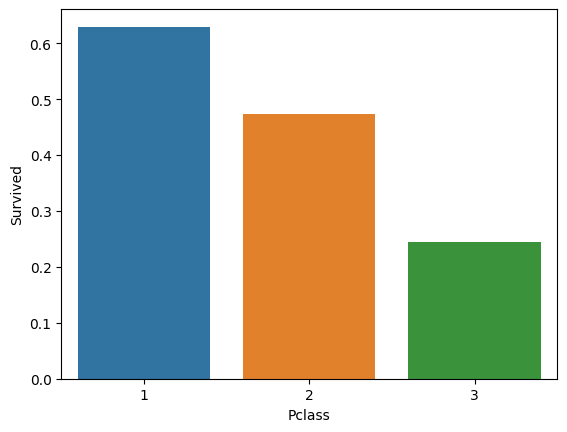

In [26]:
# Visualize the relationship between passenger class and survival rates
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data =titanic, x = 'Pclass', y='Survived', errorbar = None)

Now, because we haven't actually computed a statistical test, we don't know for sure that there is strong evidence of a relationship between both ticket class and survival. This is where our Chi-Squared test will come in!

Our hypothesis would look something like this:

$Ho$: There is no relationship between passenger class and surviving on the Titanic

$Ha$: There is a relationship between passenger class and survival on the Titanic

Just like with the t-test example, if the p-value is less than that of our desired significance level, we will reject our null hypothesis. If the p-value is greater than the significance level, we will fail to reject the null hypothesis!

In [28]:
stat, p_val, dof, exp_freq = chi2_contingency(pd.crosstab(titanic['Pclass'], titanic['Survived']))

print(p_val)

1.0496962042983217e-22


Our p-value returns as scientific notation. Remember that this can also be represented as: $1.05 * 10^-22$

This p-value is extremely small, meaning we would reject the null hypothesis at any significance level and can conclude that there is a relationship between the two variables.

So, we can absolutely correlate the passenger class with survival rate. This makes sense and is backed up by the conditional distribution we did earlier!